In [1]:
%%capture
!pip install jupyterthemes
!pip install scikit-optimize

from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
%%capture
%%bash
wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
tar -xvf images.tar
rm images.tar 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model

In [4]:
data_folder = 'Images'
num_labels = len(os.listdir(data_folder))

# imports the mobilenet model and discards the last neuron layer.
base_model = Xception(weights='imagenet', include_top=False)

# get count of base layers
num_layers = len(base_model.layers)

x = base_model.output
x = GlobalAveragePooling2D()(x)
# we add dense layers so that the model can learn 
# more complex functions and classify for better results.
x = Dense(1024, activation='relu')(x) 
# dense layer 2
x = Dense(1024, activation='relu')(x)
# dense layer 3 
x = Dense(512, activation='relu')(x) 
# final layer with softmax activation
preds = Dense(num_labels, activation='softmax')(x)

# specify the inputs / outputs
# now a model has been created based on our architecture
model = Model(inputs=base_model.input, outputs=preds)

# freeze base model layers
for layer in model.layers[:num_layers]:
    layer.trainable = False
for layer in model.layers[num_layers:]:
    layer.trainable = True

83689472/83683744 [==============================] - 1s 0us/step


In [5]:
augmentations = dict(
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=(.8, 1),
    brightness_range=(.75, 1)
)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   **augmentations)

train_generator = train_datagen.flow_from_directory(data_folder,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 20580 images belonging to 120 classes.


In [6]:
classes = train_generator.class_indices
for i, _ in zip(classes, range(5)):
    print(i, ':', classes[i])

n02085620-Chihuahua : 0
n02085782-Japanese_spaniel : 1
n02085936-Maltese_dog : 2
n02086079-Pekinese : 3
n02086240-Shih-Tzu : 4


In [ ]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

step_size_train = train_generator.n // train_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=10,
                    verbose=1)

model.save('model.h5')

Epoch 1/10
643/643 [==============================] - 297s 461ms/step - loss: 1.1840 - accuracy: 0.6843
Epoch 2/10
643/643 [==============================] - 296s 461ms/step - loss: 0.8007 - accuracy: 0.7685
Epoch 3/10
643/643 [==============================] - 296s 460ms/step - loss: 0.7291 - accuracy: 0.7904
Epoch 4/10
643/643 [==============================] - 296s 460ms/step - loss: 0.6606 - accuracy: 0.8051
Epoch 5/10
643/643 [==============================] - 296s 461ms/step - loss: 0.6118 - accuracy: 0.8199
Epoch 6/10
643/643 [==============================] - 296s 460ms/step - loss: 0.5779 - accuracy: 0.8285
Epoch 7/10
643/643 [==============================] - 296s 460ms/step - loss: 0.5403 - accuracy: 0.8360
Epoch 8/10
643/643 [==============================] - 295s 460ms/step - loss: 0.5140 - accuracy: 0.8437
Epoch 9/10
643/643 [==============================] - 296s 460ms/step - loss: 0.4820 - accuracy: 0.8538
Epoch 10/10
643/643 [==============================] - 295s 459m

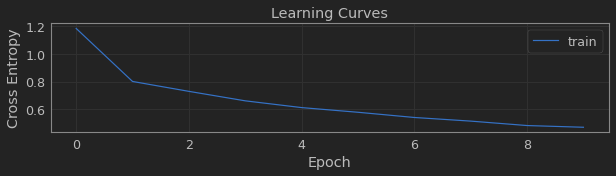

In [ ]:
plt.figure(figsize=(10, 2))
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [ ]:
model = load_model('model.h5')

In [44]:
%%capture
!wget https://upload.wikimedia.org/wikipedia/commons/8/8b/Redbone-coonhound-detail.jpg -O test.jpg

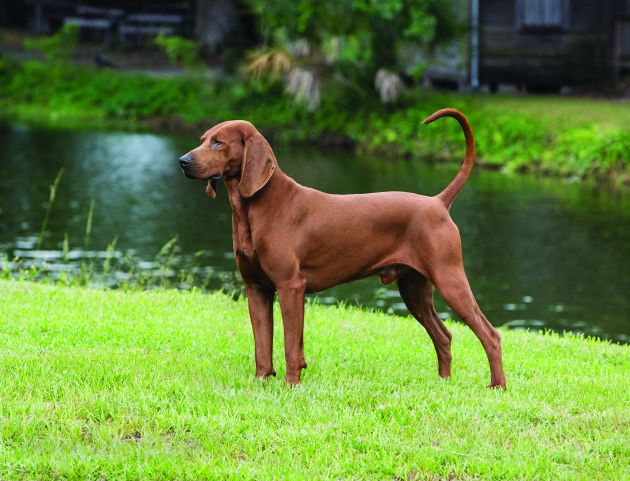

In [45]:
f = 'test.jpg'

img = load_img(f, target_size=(299, 299))

from IPython.display import Image
Image(filename=f, height=400)

In [46]:
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

In [47]:
preds = model.predict(img, use_multiprocessing=True)

top_preds(classes, preds[0], 5)

n02090379-redbone : 55.83%
n02087394-Rhodesian_ridgeback : 14.94%
n02100583-vizsla : 8.18%
n02088466-bloodhound : 2.74%
n02093991-Irish_terrier : 1.97%


In [12]:
def top_preds(classes, preds, n=5):
    _classes = {v: k for k, v in classes.items()}
    _preds = preds.argsort()[::-1][:n]

    t = [(_classes[i], preds[i]) for i in _preds]

    for i, j in t:
        print('{0} : {1:0.02%}'.format(i, j))

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [11]:
folder = '/content/drive/My Drive/Colab Notebooks/Machine Learning/Deep Learning/Image Classification'
os.chdir(folder)
# model.save('model2.h5')
model = load_model('model2.h5')

In [ ]:
!ls

model2.h5  model2.ipynb  model.h5  model.ipynb	test.jpg
